<a href="https://colab.research.google.com/github/issacridhin/S5_Predictive-Analysis/blob/main/2348546_Lab2_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')

print(X.head())
print(y.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [ ]:
# Check for missing values
print(X.isnull().sum())

# If there were missing values, we can fill them using fillna:
# X.fillna(X.mean(), inplace=True)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Exploratory Data Analysis (EDA)

**correlation matrix**

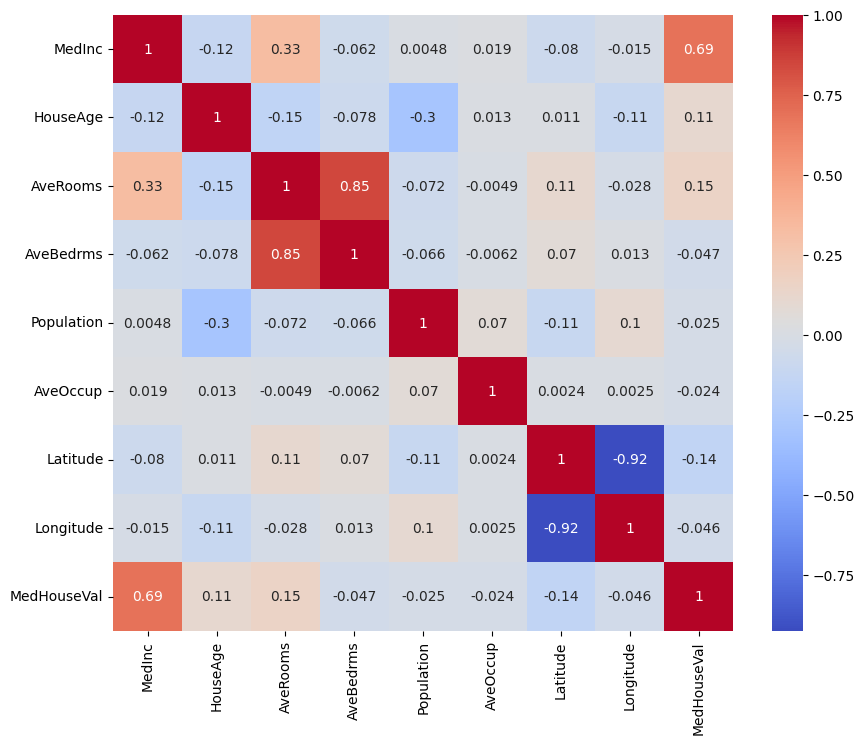

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = pd.concat([X, y], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


**Scatter plot**

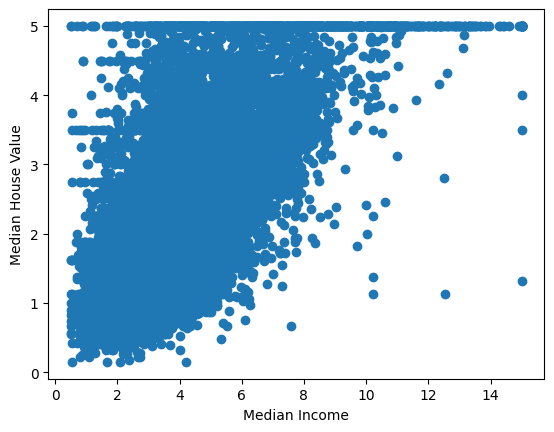

In [ ]:
# Scatter plot of Median Income vs. House Value
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


**Histogram**

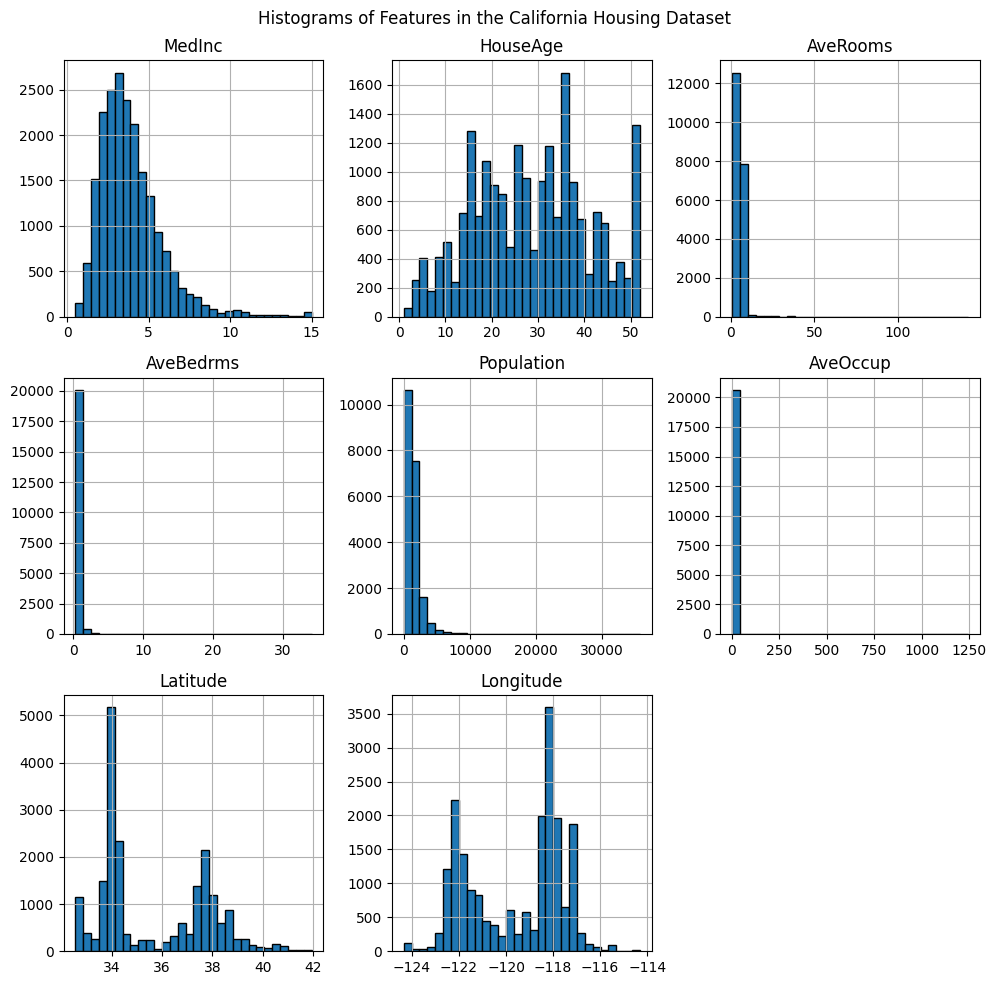

In [ ]:
# Plot histograms for each feature
X.hist(bins=30, figsize=(10, 10), edgecolor='black')
plt.suptitle('Histograms of Features in the California Housing Dataset')
plt.tight_layout()
plt.show()

#Model Building

**Multiple Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
print('Multiple Linear Regression:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R-squared:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


Multiple Linear Regression:
RMSE: 0.7455813830127761
R-squared: 0.5757877060324511
MAE: 0.5332001304956565


**Ridge Regression (L2 Regularization)**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}  # Regularization strength

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

y_pred_ridge = ridge_grid.predict(X_test)

print('Ridge Regression:')
print('Best Alpha:', ridge_grid.best_params_)
print('RMSE:', mean_squared_error(y_test, y_pred_ridge, squared=False))
print('R-squared:', r2_score(y_test, y_pred_ridge))
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))


Ridge Regression:
Best Alpha: {'alpha': 0.1}
RMSE: 0.745578665891467
R-squared: 0.5757907979394903
MAE: 0.5331994387872134


**Lasso Regression (L1 Regularization)**

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_params = {'alpha': [0.1, 1, 10, 100]}  # Regularization strength

lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)

y_pred_lasso = lasso_grid.predict(X_test)

print('Lasso Regression:')
print('Best Alpha:', lasso_grid.best_params_)
print('RMSE:', mean_squared_error(y_test, y_pred_lasso, squared=False))
print('R-squared:', r2_score(y_test, y_pred_lasso))
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))


Lasso Regression:
Best Alpha: {'alpha': 0.1}
RMSE: 0.824349148731848
R-squared: 0.4814202815313765
MAE: 0.6221475526943097


#Visualization of Results

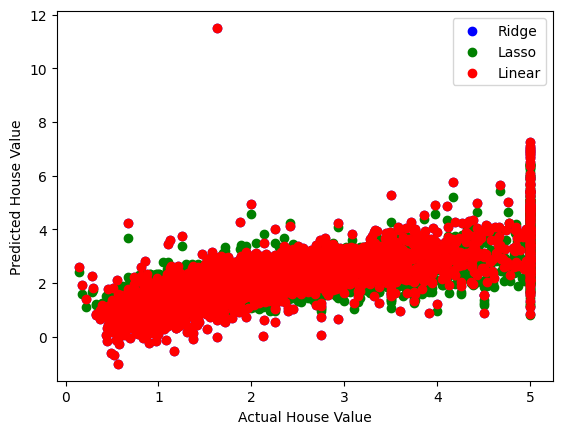

In [ ]:
plt.scatter(y_test, y_pred_ridge, color='blue', label='Ridge')
plt.scatter(y_test, y_pred_lasso, color='green', label='Lasso')
plt.scatter(y_test, y_pred, color='red', label='Linear')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.legend()
plt.show()


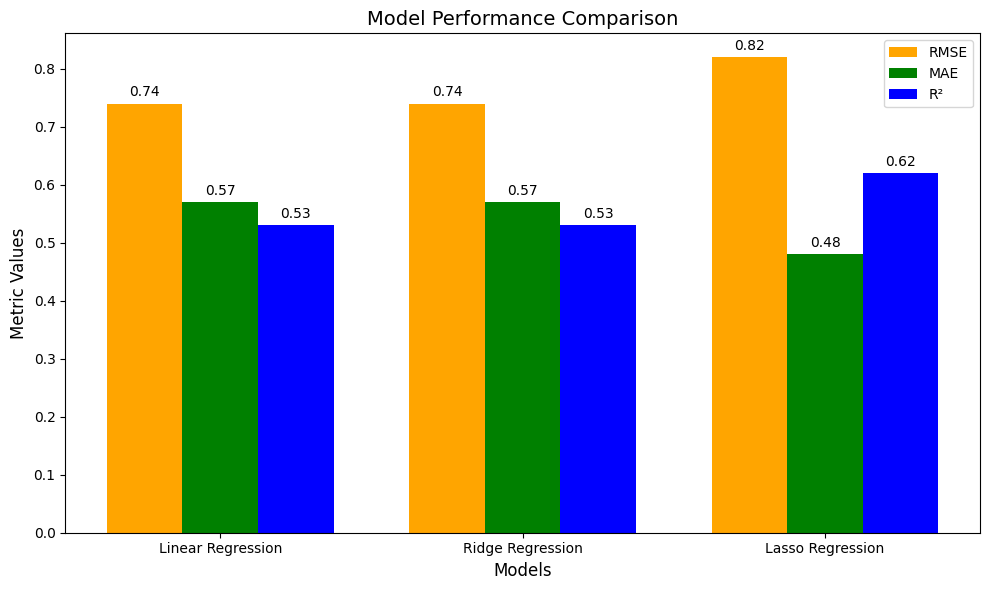

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
rmse_values = [0.74, 0.74, 0.82]
mae_values = [0.57, 0.57, 0.48]
r2_values = [0.53, 0.53, 0.62]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width and positions
bar_width = 0.25
index = np.arange(len(models))

# Plotting the bars for RMSE, MAE, and R²
bar1 = ax.bar(index, rmse_values, bar_width, label='RMSE', color='orange')
bar2 = ax.bar(index + bar_width, mae_values, bar_width, label='MAE', color='green')
bar3 = ax.bar(index + 2 * bar_width, r2_values, bar_width, label='R²', color='blue')

# Adding labels and title
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Metric Values', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of each bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bar1)
add_value_labels(bar2)
add_value_labels(bar3)

# Show the plot
plt.tight_layout()
plt.show()

#Inference


**Overview:**
   The above plot displays the performance metrics for three regression models: Linear Regression, Ridge Regression, and Lasso Regression. The metrics compared are Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²).

**Analysis:**

   - **RMSE (Orange Bars):**
     - **Interpretation:** Both Linear Regression and Ridge Regression have the lowest RMSE values of 0.74, indicating that they have better predictive accuracy compared to Lasso Regression. The Lasso Regression model shows a higher RMSE, suggesting it has higher prediction errors.

   - **MAE (Green Bars):**
     - **Interpretation:** Here, Lasso Regression performs better with the lowest MAE value of 0.48, meaning it has the smallest average absolute errors compared to Linear and Ridge Regression. Both Linear and Ridge Regression have identical MAE values, which are higher than that of Lasso Regression.

   - **R² (Blue Bars):**
     - **Interpretation:** Lasso Regression has the highest R² value of 0.62, indicating it explains more of the variance in the dependent variable compared to Linear and Ridge Regression. Both Linear and Ridge Regression have the same R² value, which is lower than Lasso Regression, reflecting less explanatory power.


  **Overall Performance:** We can see Lasso Regression, shows the best performance in terms of R² and MAE, indicating it has the highest explanatory power and the lowest average errors. However, it has a higher RMSE compared to Linear and Ridge Regression, suggesting that while it may fit the data better, it could have larger individual prediction errors.

